In [170]:
import pandas as pd
import numpy as np

# Headers from the horse-colic.names.txt file
data_headers = ['had_surgery','age','hospital_number','rectal_temp','pulse',
    'resp_rate','temp_of_extremities','peripheral_pulse','mucous_membrane',
    'capillary_refill_time','pain','peristalsis','abdominal_distension',
    'nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH',
    'rectal_examination_feces','abdomen','packed_cell_volume','total_protein',
    'abdominocentesis_appearance','abdomcentesis_total_protein','outcome',
    'had_surgical_lesion','lesion_site','lesion_type','lesion_subtype',
    'lesion_specific_code','cp_data']

# Load the dataset
data = pd.read_csv('uci-horse-colic-data/horse-colic.data.csv',sep=' ',names=data_headers)

# The cp_data column contains no data, can delete this.
data = data.drop('cp_data',axis=1)

# The data contains ? in place of missing/NaN data. Change this.
data[data == '?'] = np.nan
data.astype(dtype=float)
print('Dataset size: ', data.shape)

# First identify null or missing data
print(data.isnull().sum())
num_missing_data = data.isnull().any(axis=1).sum()
print('Total empty data points: ', num_missing_data)

Dataset size:  (300, 28)
had_surgery                      1
age                              0
hospital_number                  0
rectal_temp                     60
pulse                           24
resp_rate                       58
temp_of_extremities             56
peripheral_pulse                69
mucous_membrane                 47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          247
rectal_examination_feces       102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          1
had_surgical_lesion              0
lesion_site                      0
lesion_type                      0
lesion_subtype                   0
lesion_specific_code          

In [171]:
missing_had_surgery = data[data.had_surgery.isnull()]
data = data.drop(missing_had_surgery.index)

# Update null or missing data
print(data.isnull().sum())
num_missing_data = data.isnull().any(axis=1).sum()
print('Total empty data points: ', num_missing_data)

had_surgery                      0
age                              0
hospital_number                  0
rectal_temp                     60
pulse                           24
resp_rate                       58
temp_of_extremities             56
peripheral_pulse                69
mucous_membrane                 47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          246
rectal_examination_feces       102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          0
had_surgical_lesion              0
lesion_site                      0
lesion_type                      0
lesion_subtype                   0
lesion_specific_code             0
dtype: int64
Total e

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the label column
label = 'outcome'
label_data = data[label]

# Convert outcome to words
def outcome_str(y):
    outcomes = []
    for val in y:
        if val == '1':
            outcome = 'lived'
        elif val == '2':
            outcome = 'died'
        elif val == '3':
            outcome = 'euthanized'
        outcomes += [outcome]
    return outcomes

# Add new column with outcome in words
data.insert(0, 'outcome_in_words', outcome_str(data[label]),True)
data.head()

,outcome_in_words,had_surgery,age,hospital_number,rectal_temp,pulse,resp_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,had_surgical_lesion,lesion_site,lesion_type,lesion_subtype,lesion_specific_code
0,died,2,1,530101,38.50,66,28,3,3,NaN,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,euthanized,1,1,534817,39.2,88,20,NaN,NaN,4,...,50,85,2,2,3,2,2208,0,0,2
2,lived,2,1,530334,38.30,40,24,1,1,3,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,died,1,9,5290409,39.10,164,84,4,1,6,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,died,2,1,530255,37.30,104,35,NaN,NaN,6,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2


In [173]:
# Makes more sense for 'had_surgery' to be either 0 or 1
data['had_surgery'] = data['had_surgery'].replace('2','0')

# The age column has incorrect numbers (9 should be 2)
data['age'] = data['age'].replace(9,2)

data.head()

,outcome_in_words,had_surgery,age,hospital_number,rectal_temp,pulse,resp_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,had_surgical_lesion,lesion_site,lesion_type,lesion_subtype,lesion_specific_code
0,died,0,1,530101,38.50,66,28,3,3,NaN,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,euthanized,1,1,534817,39.2,88,20,NaN,NaN,4,...,50,85,2,2,3,2,2208,0,0,2
2,lived,0,1,530334,38.30,40,24,1,1,3,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,died,1,2,5290409,39.10,164,84,4,1,6,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,died,0,1,530255,37.30,104,35,NaN,NaN,6,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2


In [174]:
import graphing

# Create a histogram showing outcome_in_words 
graphing.histogram(data, label_x = 'outcome_in_words')

In [175]:
# Split features into numeric and categorical features
numeric_features = ['rectal_temp','pulse','resp_rate','nasogastric_reflux_PH',
                    'packed_cell_volume','total_protein','abdomcentesis_total_protein',]
categorical_features = ['had_surgery','age','temp_of_extremities',
                        'peripheral_pulse','mucous_membrane','capillary_refill_time',
                        'pain','peristalsis','abdominal_distension','nasogastric_tube',
                        'nasogastric_reflux','rectal_examination_feces','abdomen',
                        'had_surgical_lesion']

# Convert data types to appropriate types
for feat in numeric_features:
    data[feat] = pd.to_numeric(data[feat])

for feat in categorical_features:
    data[feat] = data[feat].astype('category')
data.dtypes


outcome_in_words                 object
had_surgery                    category
age                            category
hospital_number                   int64
rectal_temp                     float64
pulse                           float64
resp_rate                       float64
temp_of_extremities            category
peripheral_pulse               category
mucous_membrane                category
capillary_refill_time          category
pain                           category
peristalsis                    category
abdominal_distension           category
nasogastric_tube               category
nasogastric_reflux             category
nasogastric_reflux_PH           float64
rectal_examination_feces       category
abdomen                        category
packed_cell_volume              float64
total_protein                   float64
abdominocentesis_appearance      object
abdomcentesis_total_protein     float64
outcome                          object
had_surgical_lesion            category


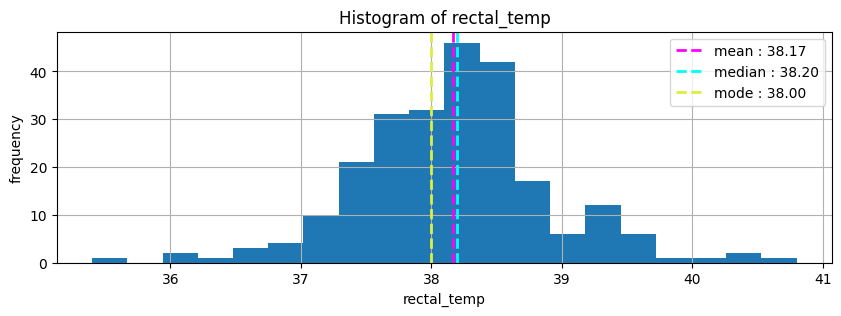

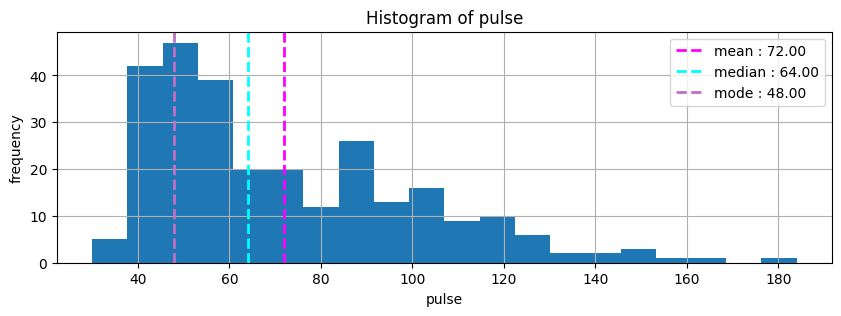

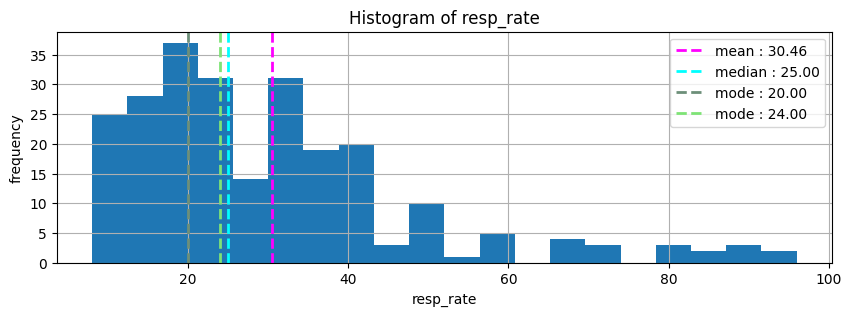

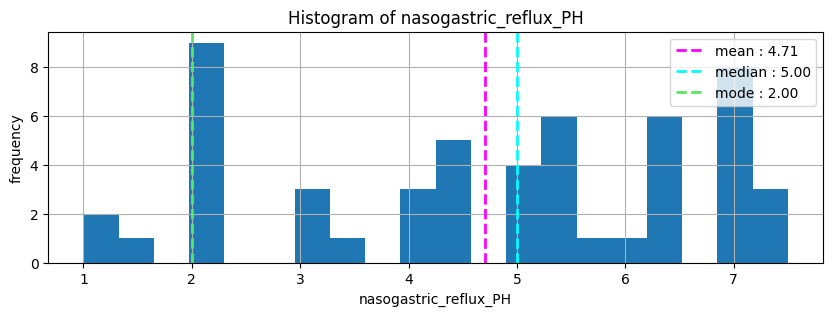

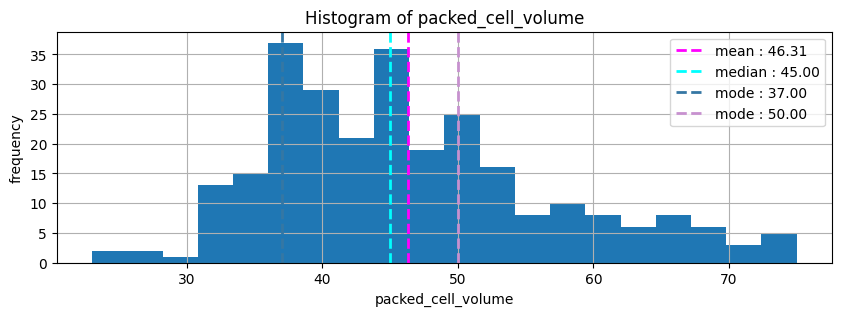

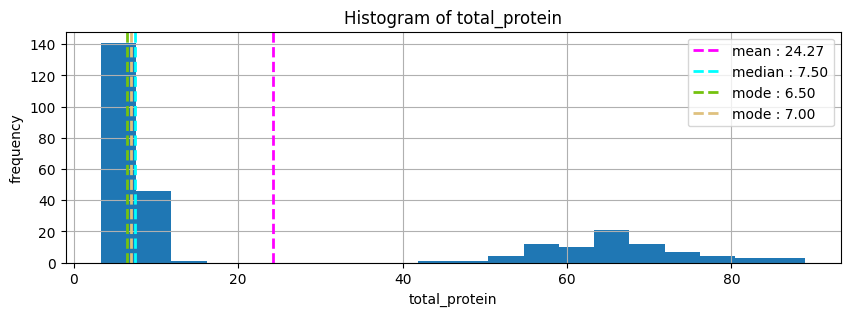

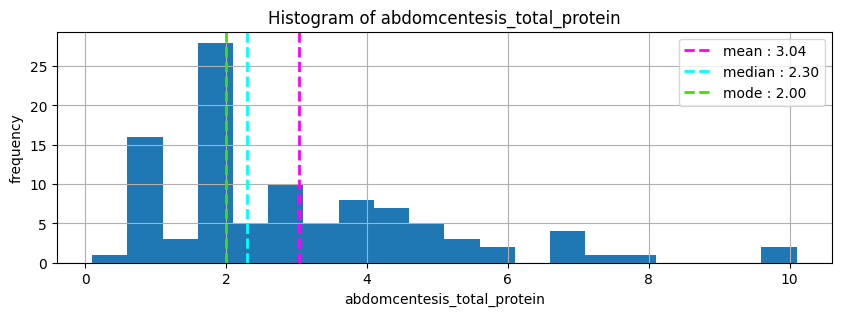

In [176]:
for col in numeric_features:
    fig = plt.figure(figsize=(10,3))
    ax = fig.gca()
    feature = data[col].astype(float)
    feature.hist(bins=20,ax = ax)
    # data.astype(float).boxplot(by = col, ax = ax)
    mean_feature = ax.axvline(feature.astype(float).mean(), color = 'magenta',linestyle = 'dashed', linewidth=2, label='mean : {:0.2f}'.format(feature.astype(float).mean()))
    median_feature = ax.axvline(feature.astype(float).median(), color = 'cyan',linestyle = 'dashed', linewidth=2, label='median : {:0.2f}'.format(feature.astype(float).median()))
    for mode in feature.astype(float).mode():
        rgb = np.random.rand(3,)
        mode_feature = ax.axvline(mode, linestyle = 'dashed', color=rgb, linewidth=2, label='mode : {:0.2f}'.format(mode))
    ax.set_title('Histogram of ' + col)
    ax.set_ylabel('frequency')
    ax.set_xlabel(col)
    plt.legend()
plt.show()

In [177]:
import graphing

for col in categorical_features:
    graphing.histogram(data, label_x=col, label_colour='outcome_in_words', show=True)

Patient 1 
  Features: ['0', 1, '3', '3', nan, '2', '5', '4', '4', nan, nan, '3', '5', 2, 38.5, 66.0, 28.0, nan, 45.0, 8.4, nan] 
  Label: 2
Patient 2 
  Features: ['1', 1, nan, nan, '4', '1', '3', '4', '2', nan, nan, '4', '2', 2, 39.2, 88.0, 20.0, nan, 50.0, 85.0, 2.0] 
  Label: 3
Patient 3 
  Features: ['0', 1, '1', '1', '3', '1', '3', '3', '1', nan, nan, '1', '1', 2, 38.3, 40.0, 24.0, nan, 33.0, 6.7, nan] 
  Label: 1
Patient 4 
  Features: ['1', 2, '4', '1', '6', '2', '2', '4', '4', '1', '2', '3', nan, 1, 39.1, 164.0, 84.0, 5.0, 48.0, 7.2, 5.3] 
  Label: 2


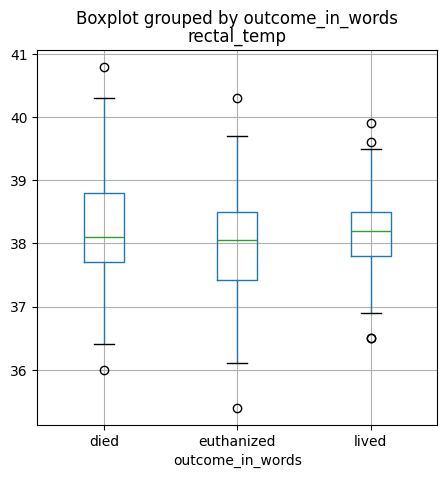

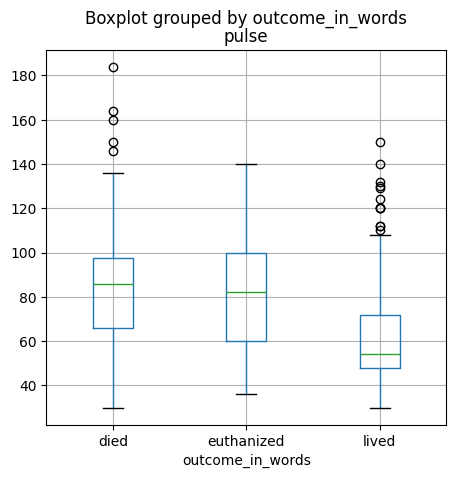

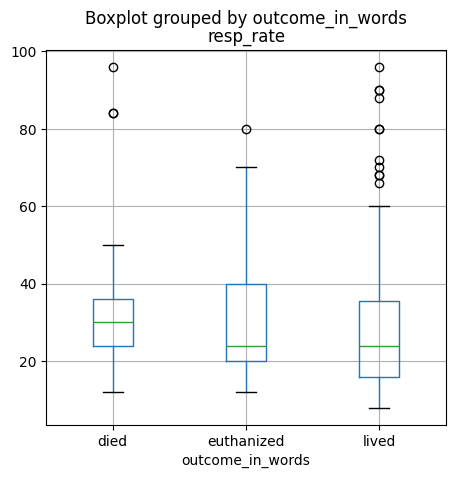

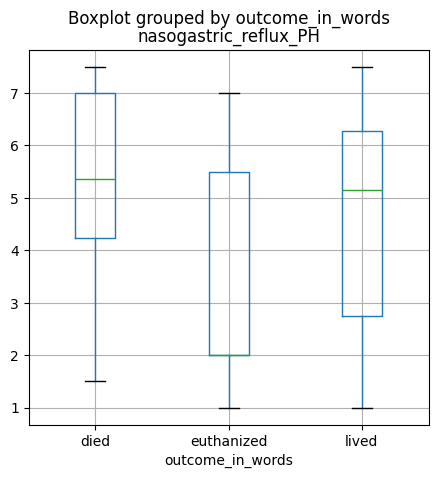

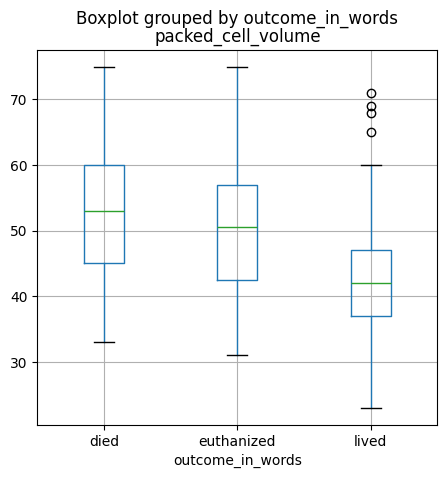

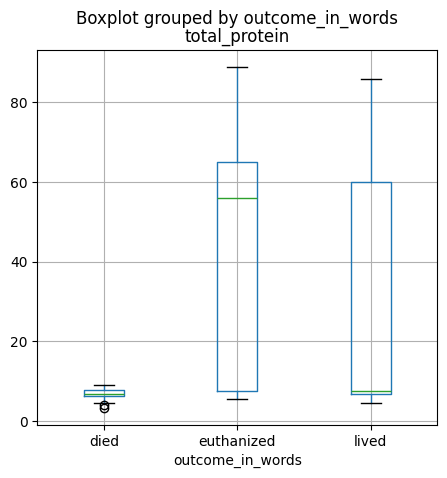

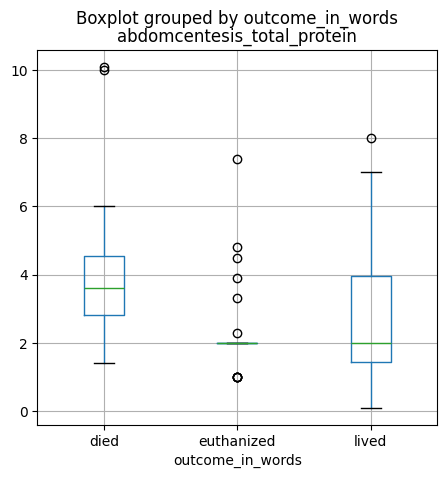

In [178]:
# Combine all features
features = categorical_features + numeric_features

# Split data for training
X, y = data[features].values, data[label].values

# Display the first 4 labels and features
for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

# Plot numeric features as box and whisker plots
for col in numeric_features:
    data.boxplot(column=col, by='outcome_in_words',figsize=(5,5))
    plt.title(col)
plt.show()

In [179]:
# It may provide more insight to create a binary category for the outcome
# Convert outcome to words
def binary_outcome(y):
    outcomes = []
    for val in y:
        if val == 'lived':
            outcome = 1
        else:
            outcome = 0
        outcomes += [outcome]
    return outcomes

# Add new column with outcome in words
data.insert(0, 'binary_outcome', binary_outcome(data['outcome_in_words']),True)
data.head()

,binary_outcome,outcome_in_words,had_surgery,age,hospital_number,rectal_temp,pulse,resp_rate,temp_of_extremities,peripheral_pulse,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,had_surgical_lesion,lesion_site,lesion_type,lesion_subtype,lesion_specific_code
0,0,died,0,1,530101,38.5,66.0,28.0,3,3,...,45.0,8.4,NaN,NaN,2,2,11300,0,0,2
1,0,euthanized,1,1,534817,39.2,88.0,20.0,NaN,NaN,...,50.0,85.0,2,2.0,3,2,2208,0,0,2
2,1,lived,0,1,530334,38.3,40.0,24.0,1,1,...,33.0,6.7,NaN,NaN,1,2,0,0,0,1
3,0,died,1,2,5290409,39.1,164.0,84.0,4,1,...,48.0,7.2,3,5.3,2,1,2208,0,0,1
4,0,died,0,1,530255,37.3,104.0,35.0,NaN,NaN,...,74.0,7.4,NaN,NaN,2,2,4300,0,0,2


Patient 1 
  Features: ['0', 1, '3', '3', nan, '2', '5', '4', '4', nan, nan, '3', '5', 2, 38.5, 66.0, 28.0, nan, 45.0, 8.4, nan] 
  Label: 0
Patient 2 
  Features: ['1', 1, nan, nan, '4', '1', '3', '4', '2', nan, nan, '4', '2', 2, 39.2, 88.0, 20.0, nan, 50.0, 85.0, 2.0] 
  Label: 0
Patient 3 
  Features: ['0', 1, '1', '1', '3', '1', '3', '3', '1', nan, nan, '1', '1', 2, 38.3, 40.0, 24.0, nan, 33.0, 6.7, nan] 
  Label: 1
Patient 4 
  Features: ['1', 2, '4', '1', '6', '2', '2', '4', '4', '1', '2', '3', nan, 1, 39.1, 164.0, 84.0, 5.0, 48.0, 7.2, 5.3] 
  Label: 0


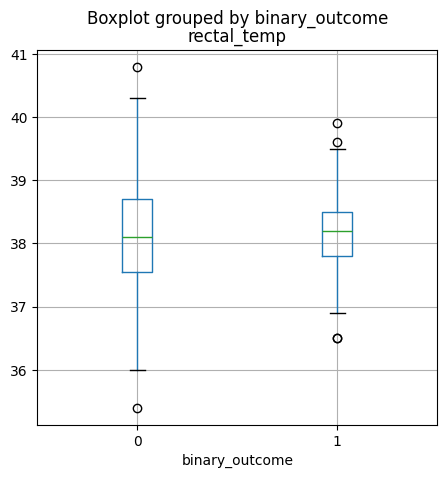

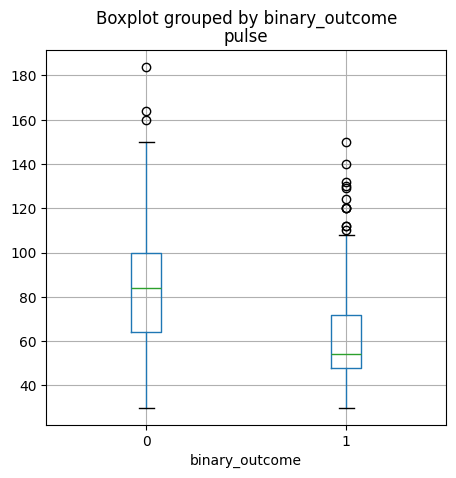

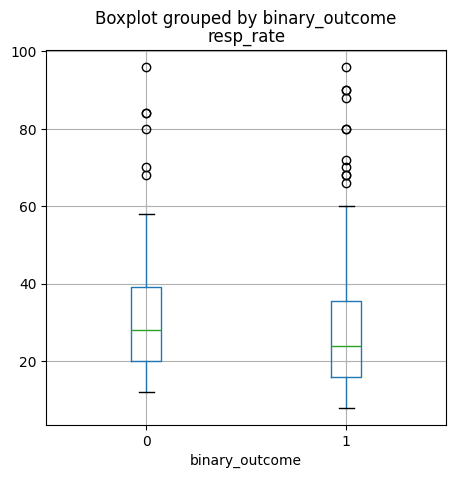

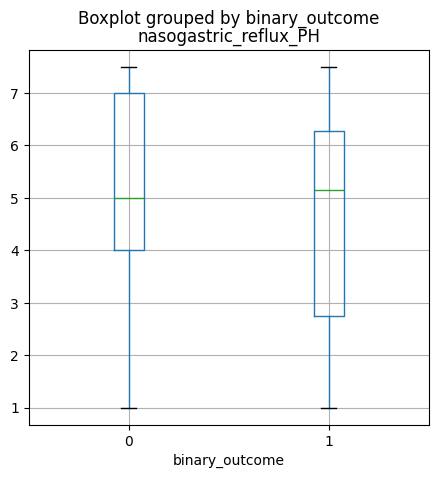

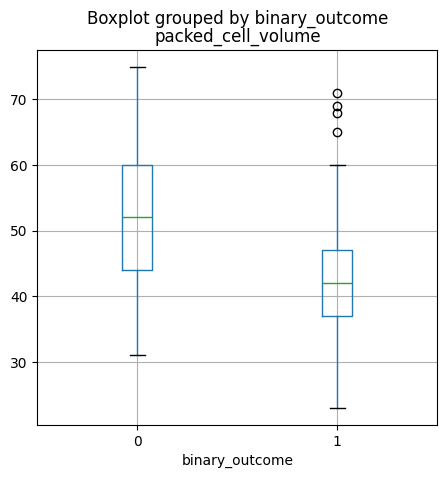

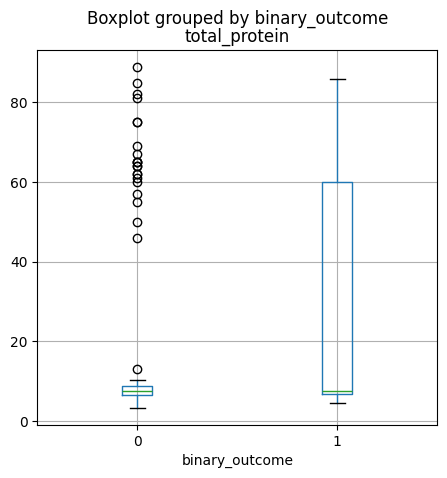

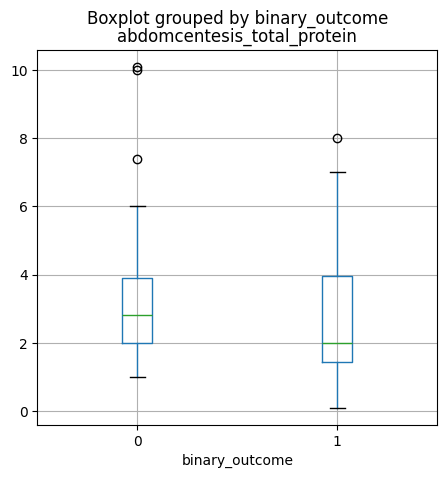

In [180]:
# Split data for training
label = 'binary_outcome'
X, y = data[features].values, data[label].values

# Display the first 4 labels and features
for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

# Plot numeric features as box and whisker plots
for col in numeric_features:
    data.boxplot(column=col, by='binary_outcome',figsize=(5,5))
    plt.title(col)
plt.show()

In [181]:
# Train the model
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Train
model = HistGradientBoostingClassifier().fit(X_train, y_train)
print(model)

Training cases: 209
Test cases: 90
HistGradientBoostingClassifier()


Accuracy:  0.7777777777777778
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        40
           1       0.75      0.90      0.82        50

    accuracy                           0.78        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.79      0.78      0.77        90



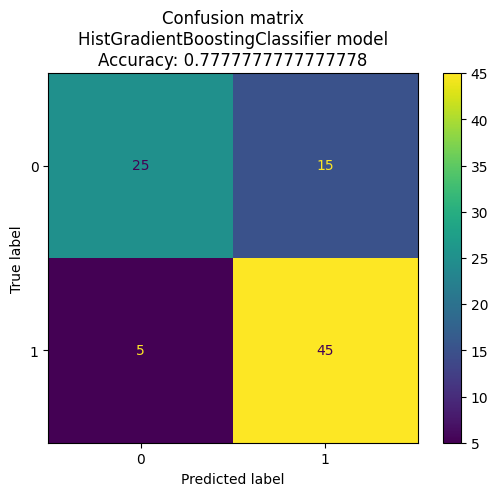

In [182]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test,predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix\nHistGradientBoostingClassifier model\nAccuracy: ' + str(accuracy_score(y_test, predictions)))
plt.show()

In [183]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[1.21281589e-02 9.87871841e-01]
 [4.04152711e-02 9.59584729e-01]
 [3.80929851e-01 6.19070149e-01]
 [3.28261441e-01 6.71738559e-01]
 [9.35118794e-01 6.48812062e-02]
 [1.88324933e-01 8.11675067e-01]
 [2.10522847e-02 9.78947715e-01]
 [4.41231966e-01 5.58768034e-01]
 [8.17728373e-03 9.91822716e-01]
 [7.71504440e-01 2.28495560e-01]
 [2.21470296e-03 9.97785297e-01]
 [7.30927462e-01 2.69072538e-01]
 [5.13612177e-01 4.86387823e-01]
 [7.59466820e-01 2.40533180e-01]
 [1.38775227e-01 8.61224773e-01]
 [1.56118605e-01 8.43881395e-01]
 [4.27787995e-02 9.57221201e-01]
 [1.77661606e-01 8.22338394e-01]
 [9.44084921e-01 5.59150789e-02]
 [4.31108341e-02 9.56889166e-01]
 [3.95121023e-01 6.04878977e-01]
 [2.40558951e-01 7.59441049e-01]
 [2.22560435e-01 7.77439565e-01]
 [8.43847238e-03 9.91561528e-01]
 [8.49118741e-02 9.15088126e-01]
 [7.53097679e-03 9.92469023e-01]
 [8.52424456e-03 9.91475755e-01]
 [8.92269381e-01 1.07730619e-01]
 [7.51061927e-01 2.48938073e-01]
 [4.89859646e-01 5.10140354e-01]
 [4.598095

AUC: 0.7935


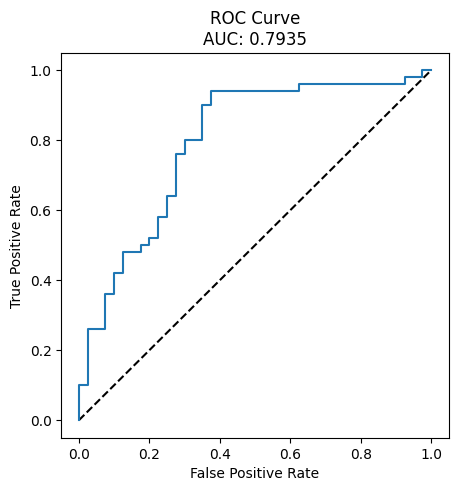

In [184]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# plot ROC curve
fig = plt.figure(figsize=(5, 5))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\nAUC: ' + str(auc))
plt.show()

This isn't half bad for a first model. 

Now I'll try to improve the performance of the model. 

In [185]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import HistGradientBoostingClassifier
import numpy as np
from scipy.sparse import csr_matrix

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
num_feats = np.arange(len(categorical_features),len(categorical_features)+len(numeric_features))
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
cat_feats = np.arange(0,len(categorical_features))
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_feats),
        ('cat', categorical_transformer, cat_feats)])

# Create preprocessing and training pipeline
pipeline = make_pipeline(preprocessor,HistGradientBoostingClassifier())
# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array([14, 15, 16, 17, 18, 19, 20])),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])


Confusion Matrix:
 [[26 14]
 [ 7 43]] 

Accuracy: 0.7666666666666667
Overall Precision: 0.7543859649122807
Overall Recall: 0.86
AUC: 0.8205


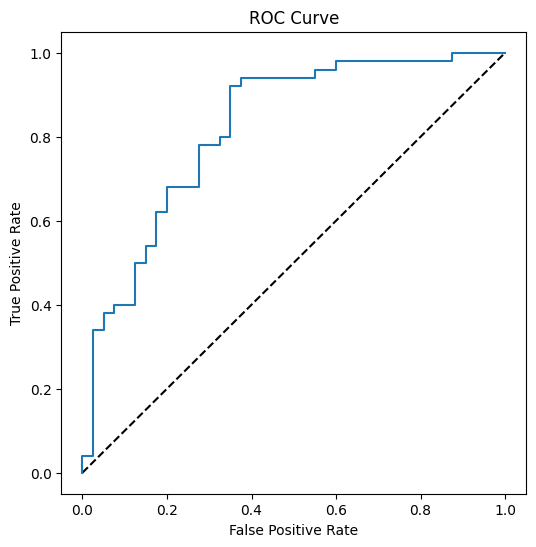

In [186]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
